In [73]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [74]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [75]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\Python\Data Science\Potato Disease Classification\Data\PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [76]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [77]:
len(dataset)

68

In [78]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 1 2 1 0 1 0 1 0 2 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0]


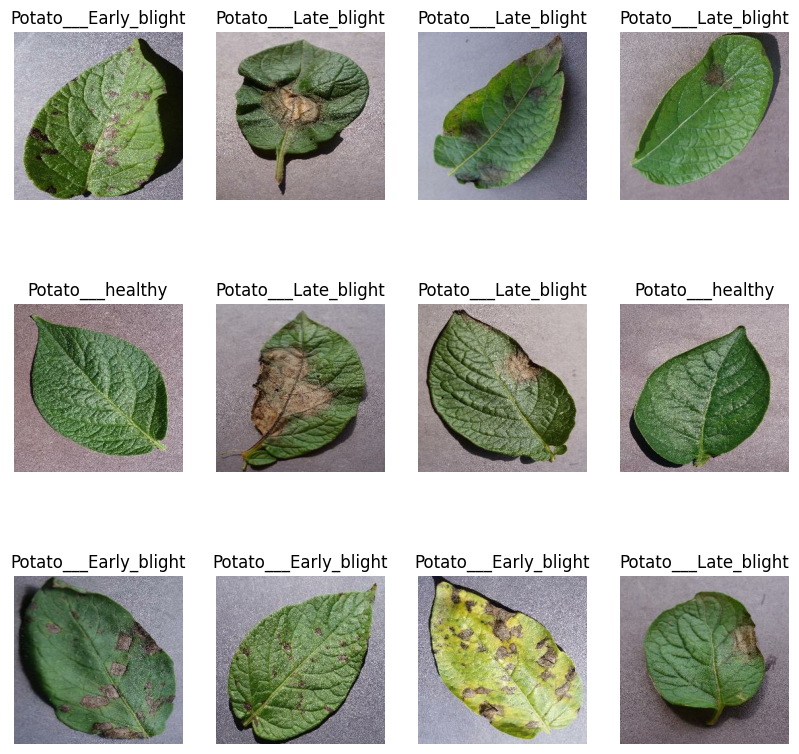

In [79]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [80]:
len(dataset)
#80% for training
#10% for validation
#10% for test

68

In [81]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [82]:
train_data = dataset.take(54)
len(train_data)

54

In [83]:
test_data = dataset.skip(54)
len(test_data)

14

In [84]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [85]:
validation_data  = test_data.take(6)
len(validation_data)

6

In [86]:
test_data = test_data.skip(6)
len(test_data)

8

In [87]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds  = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    validation_size = int(val_split * ds_size)
    
    train_data = ds.take(train_size)
    
    validation_data = ds.skip(train_size).take(validation_size)
    test_data = ds.skip(train_size).skip(validation_size)
    return train_data, validation_data, test_data

In [88]:
train_data, validation_data, test_data = get_dataset_partition(dataset)

In [89]:
len(train_data)
len(validation_data)
len(test_data)

8

In [90]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [92]:
reqize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [93]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])